In [15]:
%pylab inline
%matplotlib widget
import importlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy as np
import os
from os.path import join
import re
from scipy.io import FortranFile
import random
from mpl_toolkits import mplot3d
import ctypes as c
import struct

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fix', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import fortran_reader as fr

In [3]:
"""i = c.c_char()
print(i)
struct.unpack(i,1)"""

'i = c.c_char()\nprint(i)\nstruct.unpack(i,1)'

In [4]:

"""
reminder for NH position normalized code units (and similarly for HAGN)
px_NH = (halo_dict['px']/halo_dict['lbox_NH']) + 0.5

px_NH = (halo_dict['px']/halo_dict['lbox_NH']) + 0.5

px_NH = (halo_dict['px']/halo_dict['lbox_NH']) + 0.5

rvir_NH =(halo_dict['rvir']/halo_dict['lbox_NH']) 

"""

"\nreminder for NH position normalized code units (and similarly for HAGN)\npx_NH = (halo_dict['px']/halo_dict['lbox_NH']) + 0.5\n\npx_NH = (halo_dict['px']/halo_dict['lbox_NH']) + 0.5\n\npx_NH = (halo_dict['px']/halo_dict['lbox_NH']) + 0.5\n\nrvir_NH =(halo_dict['rvir']/halo_dict['lbox_NH']) \n\n"

# Horizon AGN 

## Haloes

In [5]:
filepath = '/Users/JanviMadhani/Desktop/Satellite Galaxies/Analysis/Horizon_AGN/tree_bricks782'

In [6]:
haloes = fr.ReadTreebrick_lowp(filepath)

nbodies: [1073741824] mpart: [0.00083533] aexp: [0.9823336] omega_t: [0.28271663] age: [13.511868] nsub: [229464  92249] nhaloes: 321713
Reading haloes took 578.48 secs.
Total time was 578.48 secs.


In [7]:
haloes_dict = haloes.treebricks_dict
print(haloes_dict['lbox_HAGN'])
print((haloes_dict['haloes'][0]['pz']/haloes_dict['lbox_HAGN'])+0.5)
print(len(haloes_dict['haloes']))
print(haloes_dict['nhaloes'])

[140.33337]
[0.9873523]
321713
321713


In [8]:
print(haloes_dict.keys())
print(haloes_dict['haloes'][0].keys())



dict_keys(['nbodies', 'mpart', 'aexp', 'omega_t', 'age_univ', 'nh_old', 'nsub_old', 'nhaloes', 'haloes', 'lbox_NH', 'lbox_HAGN'])
dict_keys(['npart', 'members', 'my_number', 'my_timestep', 'level', 'host_halo', 'host_sub', 'nchild', 'nextsub', 'mass', 'px', 'py', 'pz', 'vx', 'vy', 'vz', 'Lx', 'Ly', 'Lz', 'rmax', 'a', 'b', 'c', 'ek', 'ep', 'et', 'spin', 'rvir', 'mvir', 'tvir', 'cvel', 'rho_0', 'r_c'])


In [9]:
#extract parameters
hmass_hagn = [haloes_dict['haloes'][i]['mass'] for i in range(haloes_dict['nhaloes'])]
px_hagn = [haloes_dict['haloes'][i]['px'] for i in range(haloes_dict['nhaloes'])]
py_hagn = [haloes_dict['haloes'][i]['py'] for i in range(haloes_dict['nhaloes'])]
pz_hagn = [haloes_dict['haloes'][i]['pz'] for i in range(haloes_dict['nhaloes'])]
lbox_hagn = haloes_dict['lbox_HAGN']

#make arrays and normalize to code units
mass_h_hagn = np.asarray(hmass_hagn)*10e11
px_h_hagn = np.asarray(px_hagn)/lbox_hagn  + 0.5
py_h_hagn = np.asarray(py_hagn)/lbox_hagn  + 0.5
pz_h_hagn = np.asarray(pz_hagn)/lbox_hagn  + 0.5

## .dat files -- density cube

In [11]:
filepath2 = '/Users/JanviMadhani/Desktop/Satellite Galaxies/Analysis/Horizon_AGN/cube_gas_00782.dat'
filepath3 = '/Users/JanviMadhani/Desktop/Satellite Galaxies/Analysis/Horizon_AGN/cube_DM_00782.dat'
cubegas_dat = fr.ReadDat(filepath2)
cubeDM_dat = fr.ReadDat(filepath3)
cubegas = cubegas_dat.cube
cubeDM = cubeDM_dat.cube

Reading cube took 0.35 secs.
Reading cube took 0.29 secs.


In [12]:
print(np.shape(cubegas))
n = np.shape(cubegas)[0]

(512, 512, 512)


In [13]:
zind = 150
zslice_e = (zind  + 1 )/n
zslice_s = (zind)/n
print(zslice_e)
print(zslice_s)

cube2d_gas = cubegas[:,:,zind]
cube2d_DM = cubeDM[:,:,zind]
print(np.max(cube2d_gas))
print(np.max(cube2d_DM))
print(cubegas[0,0,0])
print(cubeDM[0,0,0])

#make a zmask
zmask_hagn = np.where((zslice_s < pz_h_hagn) & (pz_h_hagn  <= zslice_e))

0.294921875
0.29296875
40.835983
1.7507446e-05
0.29588038
2.0200608e-09


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


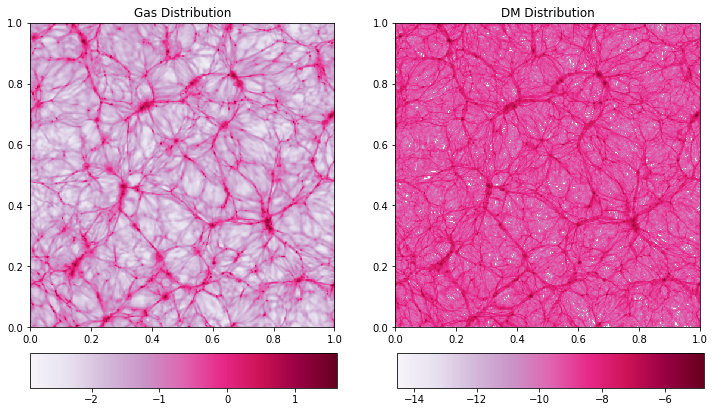

In [14]:

fix,ax = plt.subplots(1,2,figsize=[12,6])

#gas
im1 = ax[0].imshow(np.log10(cube2d_gas),cmap='PuRd',origin='lower',extent=[0,1,0,1])
#ax[0].imshow(np.log10(cube2d_gas)+1,cmap='PuRd',vmin = np.min(cube2d_gas),vmax=np.min(cube2d_gas)+15,origin='lower',extent=[0,1,0,1])
ax[0].set_title('Gas Distribution')
cax0 = plt.axes([0.125, 0.01, 0.355, 0.08])
plt.colorbar(im1,cax = cax0,orientation='horizontal')

#DM
im2 = ax[1].imshow(np.log10(cube2d_DM),cmap='PuRd',alpha = 1,origin='lower',extent=[0,1,0,1])
#ax[1].imshow(np.log10(cube2d_DM)+1,cmap='PuRd',vmin = np.min(cube2d_DM),vmax=np.min(cube2d_DM)+1.0e-7,alpha = 1,origin='lower',extent=[0,1,0,1])
ax[1].set_title('DM Distribution')
cax1 = plt.axes([0.55,0.01,0.355,0.08]) #[x,y,length,width]
plt.colorbar(im2,cax = cax1,orientation='horizontal')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

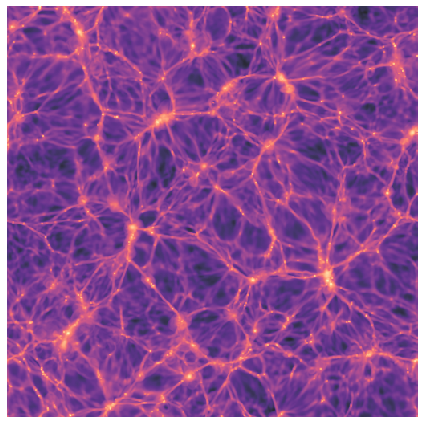

In [16]:

fix,ax = plt.subplots(1,1,figsize=[12,6])

#gas
im1 = ax.imshow(np.log10(cube2d_gas),cmap='magma',origin='lower',alpha=0.85,extent=[0,1,0,1])
#ax[0].imshow(np.log10(cube2d_gas)+1,cmap='PuRd',vmin = np.min(cube2d_gas),vmax=np.min(cube2d_gas)+15,origin='lower',extent=[0,1,0,1])
plt.axis('off')
plt.tight_layout()
plt.savefig('/Users/JanviMadhani/Desktop/Research Reports/Research Exam 2nd year/cosmic_filaments.png',bbox_inches='tight')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


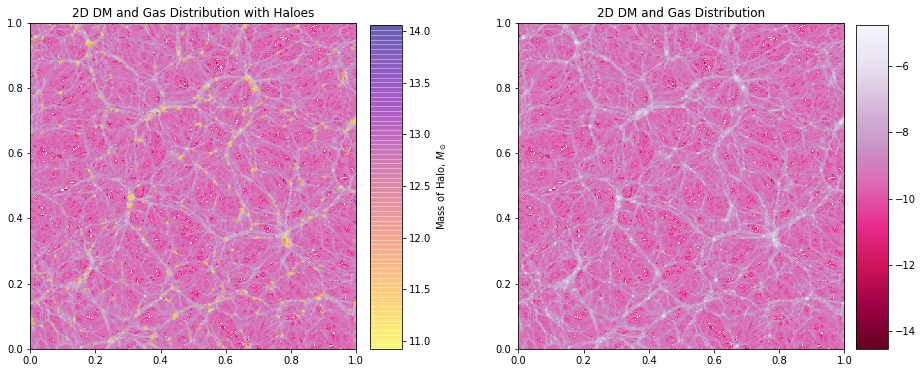

In [17]:
#overplot some haloes

px_h_zs = px_h_hagn[zmask_hagn]
py_h_zs = py_h_hagn[zmask_hagn]
mass_h_zs = mass_h_hagn[zmask_hagn]

fix,ax = plt.subplots(1,2,figsize=[15,6])

ax[0].set_title('2D DM and Gas Distribution with Haloes')

#gas

im1 = ax[0].imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[0,1,0,1])


#DM

im2 = ax[0].imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[0,1,0,1])
cax = plt.axes([0.9,0.125,0.03,0.75]) #[x,y,length,width]
plt.colorbar(im2,cax = cax,orientation='vertical')

cax_halo = plt.axes([0.45,0.125,0.03,0.75]) #[x,y,length,width]
imh = ax[0].scatter(px_h_zs,py_h_zs,s=4,c=np.squeeze(np.log10(mass_h_zs)),cmap='plasma_r',alpha=0.4)
plt.colorbar(imh,cax=cax_halo,orientation='vertical',label=r'Mass of Halo, $M_\odot$')
ax[0].autoscale(False)
ax[1].set_title('2D DM and Gas Distribution')
im3 = ax[1].imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[0,1,0,1])
im3 = ax[1].imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[0,1,0,1])

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()

# New Horizon

In [18]:
xcoord = 0.18776
ycoord = 0.42237
zcoord = 0.27435 

#rescale to arbitray range
"""
newvalue= (max'-min')/(max-min)*(value-max)+max'
or
newvalue= (max'-min')/(max-min)*(value-min)+min'
"""

"\nnewvalue= (max'-min')/(max-min)*(value-max)+max'\nor\nnewvalue= (max'-min')/(max-min)*(value-min)+min'\n"

In [31]:
#position of halo = [-2.77927661] ,[-0.26692456] ,[-9.50934982] # physical units in nh


def rescale_to_HAGN(x,y,z,r):
    """
    x,y,z = positions in physical units in NH
    """
    xnh, ynh, znh = 0.18776, 0.42237, 0.27435 #position of nh in hagn
    xcoord,ycoord,zcoord = 0.5,0.5,0.5
    
    lbox_hagn = 117.981895
    
    xhagn = x / lbox_hagn
    xhagn += xnh
    
    yhagn = y / lbox_hagn
    yhagn += ynh
    
    zhagn = z / lbox_hagn
    zhagn += znh
    
    rhagn = r/lbox_hagn
    
    return xhagn,yhagn,zhagn,rhagn
    
    

  

In [33]:
rescalex, rescaley, rescalez, rescalr = rescale_to_HAGN(-2.77927661, -0.26692456 ,-9.50934982,0.33019677)
print(rescalex, rescaley, rescalez, rescalr)

0.4764431940171837 0.4977375803295921 0.4193999230136115 0.0027987071236650336


## Filaments

In [ ]:
"""filepath_fil = '/Users/JanviMadhani/Desktop/Satellite Galaxies/Analysis/New_Horizon/cube_gas_output_00900_smooth05_c0.01.up.NDskl'
filaments = fr.ReadFilament(filepath_fil)
"""

## Haloes

In [21]:
filepath_nh = '/Users/JanviMadhani/Desktop/Satellite Galaxies/Analysis/New_Horizon/tree_bricks970'
haloes_nh = fr.ReadTreebrick_lowp(filepath_nh)


nbodies: [126492136] mpart: [1.3052102e-05] aexp: [0.82587326] omega_t: [0.39877856] age: [11.216812] nsub: [19209 10241] nhaloes: 29450
Reading haloes took 27.06 secs.
Total time was 27.07 secs.


In [22]:
haloes_nh_dict = haloes_nh.treebricks_dict

In [23]:
px_h_nh = [haloes_nh_dict['haloes'][i]['px'] for i in range(haloes_nh_dict['nhaloes'])]
py_h_nh = [haloes_nh_dict['haloes'][i]['py'] for i in range(haloes_nh_dict['nhaloes'])]
pz_h_nh = [haloes_nh_dict['haloes'][i]['pz'] for i in range(haloes_nh_dict['nhaloes'])]
mass_h_nh = [haloes_nh_dict['haloes'][i]['mass'] for i in range(haloes_nh_dict['nhaloes'])]

mass_h_nh = np.asarray(mass_h_nh)*10e11
lbox_h_hagn = haloes_nh_dict['lbox_HAGN']


#raw values in Mpc (instead of + _coord, + 0.5 will place it in center of HAGN, which is then NH scale )
px_h_nh = (np.asarray(px_h_nh)/lbox_h_hagn) 
py_h_nh = (np.asarray(py_h_nh)/lbox_h_hagn) 
pz_h_nh = (np.asarray(pz_h_nh)/lbox_h_hagn)

px_h_nh = px_h_nh + xcoord
py_h_nh = py_h_nh + ycoord
pz_h_nh = pz_h_nh + zcoord







#make a zmask
zmask_nh = np.where((zslice_s < pz_h_nh) & (pz_h_nh  <= zslice_e))

In [24]:
print(haloes_nh_dict['lbox_NH'])
print((haloes_nh_dict['haloes'][0]['pz']/haloes_nh_dict['lbox_NH'])+0.5)
print(len(haloes_nh_dict['haloes']))
print(haloes_nh_dict['nhaloes'])

[16.517466]
[-2.781067]
29450
29450


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


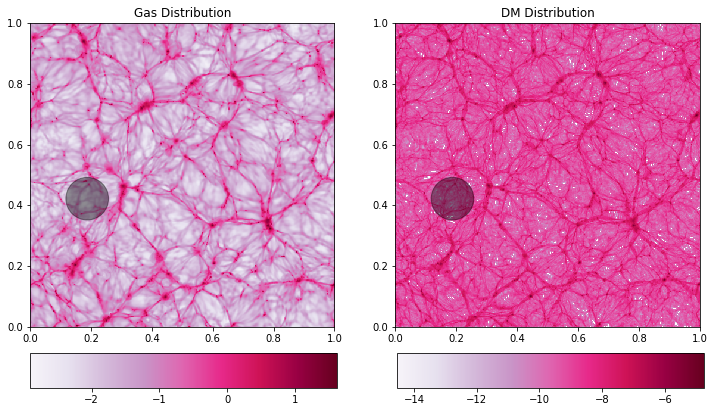

In [25]:
#zoom in on NH
fix,ax = plt.subplots(1,2,figsize=[12,6])

#gas
im1 = ax[0].imshow(np.log10(cube2d_gas),cmap='PuRd',origin='lower',extent=[0,1,0,1])
#ax[0].imshow(np.log10(cube2d_gas)+1,cmap='PuRd',vmin = np.min(cube2d_gas),vmax=np.min(cube2d_gas)+15,origin='lower',extent=[0,1,0,1])

nh_sphere = plt.Circle( (xcoord,ycoord), 0.07, color='k',alpha = 0.4)
ax[0].add_patch(nh_sphere)
ax[0].set_title('Gas Distribution')
cax0 = plt.axes([0.125, 0.01, 0.355, 0.08])
plt.colorbar(im1,cax = cax0,orientation='horizontal')

#DM
im2 = ax[1].imshow(np.log10(cube2d_DM),cmap='PuRd',alpha = 1,origin='lower',extent=[0,1,0,1])
#ax[1].imshow(np.log10(cube2d_DM)+1,cmap='PuRd',vmin = np.min(cube2d_DM),vmax=np.min(cube2d_DM)+1.0e-7,alpha = 1,origin='lower',extent=[0,1,0,1])
nh_sphere = plt.Circle( (xcoord,ycoord), 0.07, color='k',alpha = 0.4)
ax[1].add_patch(nh_sphere)
ax[1].set_title('DM Distribution')
cax1 = plt.axes([0.55,0.01,0.355,0.08]) #[x,y,length,width]
plt.colorbar(im2,cax = cax1,orientation='horizontal')

plt.show()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10


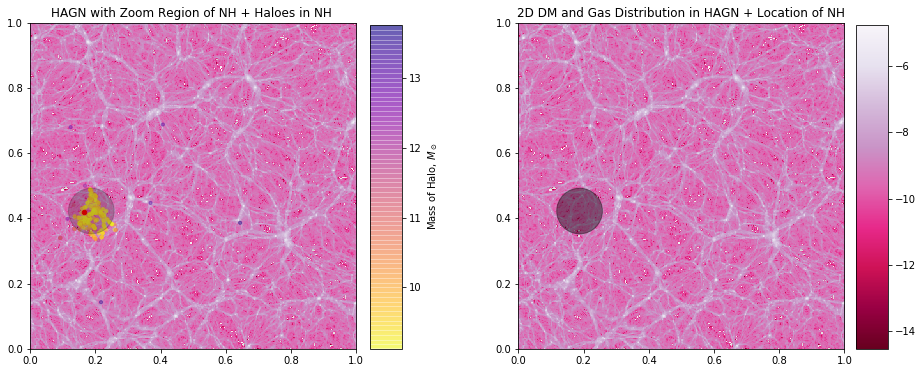

In [29]:
#overplot some haloes

#px_nh_zs = px_h_nh[zmask_nh]
#py_nh_zs = py_h_nh[zmask_nh]
#mass_nh_zs = mass_h_nh[zmask_nh]






fix,ax = plt.subplots(1,2,figsize=[15,6])

ax[0].set_title('HAGN with Zoom Region of NH + Haloes in NH ')

#gas

im1 = ax[0].imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[0,1,0,1])


#DM

im2 = ax[0].imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[0,1,0,1])
cax = plt.axes([0.9,0.125,0.03,0.75]) #[x,y,length,width]
plt.colorbar(im2,cax = cax,orientation='vertical')

cax_halo = plt.axes([0.45,0.125,0.03,0.75]) #[x,y,length,width]
#imh1 = ax[0].scatter(px_h_zs,py_h_zs,s=4,c=np.squeeze(np.log10(mass_h_zs)),cmap='plasma_r',alpha=0.4)
#imh = ax[0].scatter(px_hrn[zmask_nh],py_hrn[zmask_nh],s=4,c=np.squeeze(np.log10(mass_h_nh[zmask_nh])),cmap='plasma_r',alpha=0.4)
imh = ax[0].scatter(px_h_nh[zmask_nh],py_h_nh[zmask_nh],s=10,c=np.squeeze(np.log10(mass_h_nh[zmask_nh])),cmap='plasma_r',alpha=0.4)
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
#imh = ax[0].scatter(px_h_nh,py_h_nh,s=4,c=np.squeeze(np.log10(mass_h_nh)),cmap='plasma_r',alpha=0.4)

nh_in_hagn = ax[0].scatter(rescalex, rescaley,s = 20,c='r')
plt.colorbar(imh,cax=cax_halo,orientation='vertical',label=r'Mass of Halo, $M_\odot$')
nh_sphere = plt.Circle( (0.18776,0.42237), 0.07, color='k',alpha = 0.2)
ax[0].add_patch(nh_sphere)

ax[1].set_title('2D DM and Gas Distribution in HAGN + Location of NH')
nh_sphere = plt.Circle( (0.18776,0.42237), 0.07, color='k',alpha = 0.4)
ax[1].add_patch(nh_sphere)
im3 = ax[1].imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[0,1,0,1])
im3 = ax[1].imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[0,1,0,1])

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)


plt.savefig('NH_in_HAGN.png')
plt.show()

In [30]:
print(rescalex, rescaley, rescalez, rescalr)

0.16420319401718375 0.4201075803295921 0.1937499230136115 0.0027987071236650336


In [ ]:
fix,ax = plt.subplots(figsize=[8,8])

ax.set_title('HAGN with Zoom Region of NH + Haloes ')

#gas

im1 = ax.imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[0,1,0,1])


#DM

im2 = ax.imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[0,1,0,1])

#plt.colorbar(im2,cax = cax,orientation='vertical')

imh1 = ax.scatter(px_h_zs,py_h_zs,s=4,c=np.squeeze(np.log10(mass_h_zs)),cmap='plasma_r',alpha=0.4)
imh = ax.scatter(px_h_nh[zmask_nh],py_h_nh[zmask_nh],s=10,c=np.squeeze(np.log10(mass_h_nh[zmask_nh])),cmap='plasma_r',alpha=0.4)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
#imh = ax[0].scatter(px_h_nh,py_h_nh,s=4,c=np.squeeze(np.log10(mass_h_nh)),cmap='plasma_r',alpha=0.4)
plt.colorbar(imh,orientation='vertical',label=r'Mass of Halo, $[log_{10}(M_\odot$)]')
nh_sphere = plt.Circle( (0.18776,0.42237), 0.07, color='k',alpha = 0.2)
ax.add_patch(nh_sphere)


plt.savefig('NHZoom_in_HAGN.png')
plt.show()



In [ ]:
fix,ax = plt.subplots(figsize=[12,6])

ax.set_title('Zoom in on NH Scale')

#gas
#ax.imshow(cube2d_gas,cmap='Greys',vmin = np.min(cube2d_gas),vmax=np.min(cube2d_gas)+10,origin='lower',extent=[0,1,0,1])
im1 = ax.imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[0,1,0,1])
im2 = ax.imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[0,1,0,1])


#imh = ax.scatter(px_hrn[zmask_nh],py_hrn[zmask_nh],s=4,c=np.squeeze(np.log10(mass_h_nh[zmask_nh])),cmap='plasma_r',alpha=0.4)
#plt.colorbar(imh,label=r'Mass of Haloes, $M_\odot$')
#imhs = ax.scatter(px_hrn,py_hrn,s=4,c=np.squeeze(np.log10(mass_h_nh)),cmap='plasma_r',alpha=0.4)
imh = ax.scatter(px_h_nh[zmask_nh],py_h_nh[zmask_nh],s=10,c=np.squeeze(np.log10(mass_h_nh[zmask_nh])),cmap='plasma_r',alpha=0.4)
ax.set_xlim(xcoord-0.07,xcoord+0.07)
ax.set_ylim(ycoord-0.07,ycoord+0.07)
nh_sphere = plt.Circle( (xcoord,ycoord), 0.07, color='k',alpha = 0.2)
ax.add_patch(nh_sphere)

plt.show()

## Galaxy Catalog

In [ ]:
filepath_catalog = '/Users/JanviMadhani/Desktop/Summer_21/Analysis/New_Horizon/tree_bricks970_stars_NH'

In [ ]:
galaxies = fr.GalaxyCatalog(filepath_catalog)

In [ ]:
catalog_dict = galaxies.treebricks_dict

In [ ]:
print(catalog_dict.keys())

In [ ]:
#keys for a single galaxy
print(catalog_dict['galaxies'][0].keys())

In [ ]:
px_g = [catalog_dict['galaxies'][i]['px'] for i in range(catalog_dict['nmax'])]
py_g = [catalog_dict['galaxies'][i]['py'] for i in range(catalog_dict['nmax'])]
pz_g = [catalog_dict['galaxies'][i]['pz'] for i in range(catalog_dict['nmax'])]
lbox_g_nh = catalog_dict['lbox_NH']
lbox_g_hagn = catalog_dict['lbox_HAGN']


#normalize 
#px_gn = [(px_g[i]-min(px_g))/(max(px_g)-min(px_g)) for i in range(len(px_g))]
#py_gn = [(py_g[i]-min(py_g))/(max(py_g)-min(py_g)) for i in range(len(py_g))]
#pz_gn = [(pz_g[i]-min(pz_g))/(max(pz_g)-min(pz_g)) for i in range(len(pz_g))]

#renormalize
#xmin_prime = xcoord - 0.07
#xmax_prime = xcoord + 0.07
#ymin_prime = ycoord - 0.07
#ymax_prime = ycoord + 0.07
#zmin_prime = zcoord - 0.07
#zmax_prime = zcoord + 0.07

#newvalue= (max'-min')/(max-min)*(value-min)+min'

#px_grn = [((xmax_prime-xmin_prime)/(max(px_g)-min(px_g)))*(px_g[i]-min(px_g)) + xmin_prime for i in range(len(px_g))]
#py_grn = [((ymax_prime-ymin_prime)/(max(py_g)-min(py_g)))*(py_g[i]-min(py_g)) + ymin_prime for i in range(len(py_g))]
#pz_grn = [((zmax_prime-zmin_prime)/(max(pz_g)-min(pz_g)))*(pz_g[i]-min(pz_g)) + zmin_prime for i in range(len(pz_g))]

 
#make into arrays (instead of + _coord, + 0.5 will put it in the center of HAGN/ NH scale)
px_g = (np.asarray(px_g)/lbox_g_hagn)
py_g = (np.asarray(py_g)/lbox_g_hagn)
pz_g = (np.asarray(pz_g)/lbox_g_hagn)

px_g = px_g + xcoord
py_g = py_g + ycoord
pz_g = pz_g + zcoord




#0-1 range
"""px_gn = np.asarray(px_gn)
py_gn = np.asarray(py_gn)
pz_gn = np.asarray(pz_gn)"""

#xcoord/ycoord/zcoord +/- 0.07 range -- this will put it in the location of NH in HAGN
"""px_grn = np.asarray(px_grn)
py_grn = np.asarray(py_grn)
pz_grn = np.asarray(pz_grn)"""

##THIS will put it in the center of HAGN
"""
px_grn = px_g/lbox_g_hagn + 0.5
py_grn = py_g/lbox_g_hagn + 0.5
pz_grn = pz_g/lbox_g_hagn + 0.5

"""


In [ ]:
print(min(px_grn),max(px_grn))

In [ ]:
sigma = [catalog_dict['galaxies'][i]['sigma'] for i in range(catalog_dict['nmax'])]
sigma_bulge = [catalog_dict['galaxies'][i]['sigma_bulge'] for i in range(catalog_dict['nmax'])]
M_bulge = [catalog_dict['galaxies'][i]['m_bulge'] for i in range(catalog_dict['nmax'])]
galmass = [catalog_dict['galaxies'][i]['mass'] for i in range(catalog_dict['nmax'])]
rvir = [catalog_dict['galaxies'][i]['rvir'] for i in range(catalog_dict['nmax'])]


sigma = np.asarray(sigma)
sigma_bulge = np.asarray(sigma_bulge)
M_bulge = np.asarray(M_bulge)*10e11
galmass = np.asarray(galmass)*10e11
rvir = np.asarray(rvir)

In [ ]:
print(min(pz_g))
print(2*0.07*13.18/catalog_dict['lbox_HAGN'])
print((min(pz_g)/catalog_dict['lbox_HAGN']) + 0.5)


In [ ]:
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')

#ax.scatter3D(px_h_nh,py_h_nh,pz_h_nh,s=4,c='paleturquoise',alpha=0.3,zorder=1)
ax.scatter3D(px_g,py_g,pz_g,s=rvir*100,c='slateblue',alpha=0.3,zorder=100)
#ax.scatter3D(px_h,py_h,pz_h,s=5,c='teal',alpha=0.1)

ax.autoscale(False)
plt.show()

In [ ]:
#make a zmask
zmask_g_nh = np.where((zslice_s < pz_g) & (pz_g  <= zslice_e))

In [ ]:
print(zslice_s,zslice_e)
print(min(pz_g),max(pz_g))

In [ ]:
fix,ax = plt.subplots(figsize=[12,6])

ax.set_title('Zoom in on NH Scale')

#gas
#ax.imshow(cube2d_gas,cmap='Greys',vmin = np.min(cube2d_gas),vmax=np.min(cube2d_gas)+10,origin='lower',extent=[0,1,0,1])
im1 = ax.imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[1,0,1,0])
im2 = ax.imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[1,0,1,0])
ax.set_xlim(xcoord-0.07,xcoord+0.07)
ax.set_ylim(ycoord-0.07,ycoord+0.07)

nh_sphere = plt.Circle( (xcoord,ycoord), 0.07, color='k',alpha = 0.1)
ax.add_patch(nh_sphere)

#ax.scatter(px_grn[zmask_g_nh],py_grn[zmask_g_nh],color=np.squeeze(np.log10(galmass[zmask_g_nh])),s=2,alpha=0.4)
#ax.autoscale(False)

#imh = ax.scatter(px_nh_zs,py_nh_zs,c=np.squeeze(np.log10(mass_nh_zs)),cmap='plasma_r',alpha=0.4,zorder=10)
plt.colorbar(imh,label=r'Mass of Haloes, $M_\odot$')
imhs = ax.scatter(px_h_nh[zmask_nh],py_h_nh[zmask_nh],s=20,c=np.squeeze(np.log10(mass_h_nh[zmask_nh])),cmap='plasma_r',alpha=0.4)



img = ax.scatter(px_g[zmask_g_nh],py_g[zmask_g_nh],s=10,c=np.squeeze(np.log10(galmass[[zmask_g_nh]])),cmap='plasma',alpha=0.4)
plt.colorbar(img,label=r'Mass of Galaxies, $M_\odot$')

plt.show()

In [ ]:
#plot galaxies at center of haloes
#overplot some haloes
#sphere is shifted to 0.5, 0.5 in NH -- box is still on scale of HAGN 


fix,ax = plt.subplots(1,2,figsize=[15,6])

ax[0].set_title('2D DM and Gas Distribution with Haloes')

#gas

im1 = ax[0].imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[0,1,0,1])


#DM

im2 = ax[0].imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[0,1,0,1])
cax = plt.axes([0.9,0.125,0.03,0.75]) #[x,y,length,width]
plt.colorbar(im2,cax = cax,orientation='vertical')

cax_halo = plt.axes([0.45,0.125,0.03,0.75]) #[x,y,length,width]
#imh = ax[0].scatter(px_nh_zs,py_nh_zs,c=np.squeeze(np.log10(mass_nh_zs)),cmap='plasma',alpha=0.4)
plt.colorbar(imh,cax=cax_halo,orientation='vertical',label=r'Mass of Halo, $M_\odot$')

ax[1].set_title('2D DM and Gas Distribution with Galaxies and Haloes')
nh_sphere = plt.Circle( (0.18776,0.42237), 0.07, color='k',alpha = 0.4)
ax[1].add_patch(nh_sphere)
im3 = ax[1].imshow(np.log10(cube2d_gas),cmap='Greys',origin='lower',extent=[0,1,0,1])
im3 = ax[1].imshow(np.log10(cube2d_DM),cmap='PuRd_r',alpha = 1,origin='lower',extent=[0,1,0,1])
imh3 = ax[1].scatter(px_h_nh[zmask_nh],py_h_nh[zmask_nh],s=20,c=np.squeeze(np.log10(mass_h_nh[zmask_nh])),cmap='plasma_r',alpha=0.4)
imgz3 = ax[1].scatter(px_g[zmask_g_nh],py_g[zmask_g_nh],c=np.squeeze(np.log10(galmass[zmask_g_nh])),cmap='plasma',s=10,alpha=0.4)
#img3= ax[1].scatter(px_gr,py_grn,c=np.squeeze(np.log10(galmass)),cmap='plasma',s=2,alpha=0.4)

ax[1].set_xlim(0,1)
ax[1].set_ylim(0,1)
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
plt.show()



In [ ]:
def scatter_hist(x, y,ax, ax_histx, ax_histy,labs,clr='teal',cmap='plasma'):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

  
   
    ax.scatter(x, y,s=2,c=clr,cmap=cmap,alpha=0.5)
    ax.set_xlabel(labs[0])
    ax.set_ylabel(labs[1])

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x,color='slateblue', bins=bins)
    ax_histy.hist(y,color='slateblue',bins=bins, orientation='horizontal')

In [ ]:
fix, ax = plt.subplots(1,2, figsize=[10,6])
im1 = ax[0].scatter(np.log10(galmass),np.log10(M_bulge),s=2,c=np.squeeze(np.log10(galmass)),cmap='summer',alpha=0.4)
ax[0].set_xlabel('Mass of Galaxy')
ax[0].set_ylabel('Mass of Bulge')



im2 = ax[1].hist2d(np.squeeze(np.log10(galmass)),np.squeeze(np.log10(M_bulge)),bins=(100,100), cmap='PuRd_r')
ax[1].set_xlabel('Mass of Galaxy')
ax[1].set_ylabel('Mass of Bulge')
cax = plt.axes([0.95,0.13,0.05,0.75]) #[x,y,length,width]
plt.colorbar(im2[3],cax = cax,orientation='vertical')
plt.show()


In [ ]:
fix, ax = plt.subplots(figsize=[8,6])
im = ax.scatter(np.log10(sigma),np.log10(np.asarray(M_bulge)),s=2,c=np.squeeze(np.log10(galmass)),cmap='plasma',alpha=0.4)
plt.colorbar(im,label='Mass')
ax.set_xlabel(r'Stellar Dispersion $\sigma$')
ax.set_ylabel('Mass of Bulge')
plt.show()

In [ ]:
#M-sigma relation

#fix, ax = plt.subplots(figsize=[8,6])
#ax.scatter(np.log10(sigma),np.log10(np.asarray(M_bulge)),s=2,c='teal',alpha=0.4)
#plt.show()

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8,8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

labs = [r'Stellar Dispersion $\sigma$','Mass of Bulge']
# use the previously defined function
scatter_hist(np.log10(sigma),np.log10(np.asarray(M_bulge)),ax, ax_histx, ax_histy, labs,clr=np.squeeze(np.log10(galmass)))

plt.show()

In [ ]:
gal_vx = [catalog_dict['galaxies'][i]['vx'] for i in range(catalog_dict['nmax'])]
gal_vy = [catalog_dict['galaxies'][i]['vy'] for i in range(catalog_dict['nmax'])]
gal_vz = [catalog_dict['galaxies'][i]['vz'] for i in range(catalog_dict['nmax'])]

gal_vx = np.asarray(gal_vx)
gal_vy = np.asarray(gal_vy)
gal_vz = np.asarray(gal_vz)

In [ ]:
#velocity dispersion
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

labs = ['Galaxy Vx','Galaxy Vy']
# use the previously defined function
scatter_hist(gal_vx, gal_vy, ax, ax_histx, ax_histy, labs,clr=np.squeeze(np.log10(galmass)))

plt.show()

In [ ]:
#make a zslice of galaxies
print(np.min(pz_g),np.max(pz_g))
print(np.max(pz_g)-np.min(pz_g))
print(len(pz_g))
width = (np.max(pz_g)-np.min(pz_g))/len(pz_g)
print(width)

zs = np.min(pz_g)
ze = zs + 1
zmask = np.where((zs < pz_g) & (pz_g <= ze))

In [ ]:
print(np.linspace(np.min(px_g),np.max(px_g),len(zmask)))
print(len(zmask))

In [ ]:

#make meshgrid of 2d positions
x,y = np.meshgrid(np.linspace(np.min(px_g),np.max(px_g),len(px_g[zmask])),np.linspace(np.min(py_g),np.max(py_g),len(py_g[zmask])))
#x,y = np.meshgrid(px_g,py_g)
u,v = np.meshgrid(gal_vx[zmask],gal_vy[zmask])

fig,ax = plt.subplots(figsize=[8,8])
#add locations of stars (can color by mass)

posx = px_g[zmask]
posy = py_g[zmask]
pos = [posx,posy]
        
seed_points = np.asarray(pos)

#ax.quiver(x,y, gal_vx[zmask],gal_vy[zmask])
#strm = ax.streamplot(x,y,u,v,color=np.sqrt(u**2+v**2), linewidth=3,cmap='cool',start_points = seed_points.T)
#fig.colorbar(strm.lines)

ax.scatter(px_g[zmask],py_g[zmask],s=3,c='slateblue')
ax.set_title('Velocity of Galaxies')
plt.show()

In [ ]:
print(np.shape(seed_points))

spoints = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])
print(np.shape(spoints))

## Single Galaxy

In [ ]:
filepath_gal = '/Users/JanviMadhani/Desktop/Summer_21/Analysis/New_Horizon/gal_stars_0000008'

In [ ]:
galaxy = fr.ReadGalaxy(filepath_gal)

In [ ]:
gal_dict = galaxy.galaxies_dict

In [ ]:
gal_dict.keys()

In [ ]:
print(gal_dict['mass'])
print(gal_dict['nstars'])
print(len(gal_dict['x_stars']))
print(np.min(gal_dict['x_stars']))
print('mass',np.min(gal_dict['mass_stars']))

max_mass = np.max(gal_dict['mass_stars'])

print(gal_dict['Lz'])


In [ ]:
lz = gal_dict['Lz']
lx = gal_dict['Lx']
ly = gal_dict['Ly']
vz = gal_dict['vz']
vx = gal_dict['vx']
vy = gal_dict['vy']
angmom = np.sqrt(lz**2 + ly**2 + lx**2)
iz = np.degrees(np.arccos(lz/angmom))
ix = np.degrees(np.arccos(lx/angmom))
iy = np.degrees(np.arccos(ly/angmom))
print(angmom,iz,ix,iy,iv)

In [ ]:
#make arrays 
xstars = np.asarray(gal_dict['x_stars'])
ystars = np.asarray(gal_dict['y_stars'])
zstars = np.asarray(gal_dict['z_stars'])
ages = np.asarray(gal_dict['age_stars'])

In [ ]:
fig = plt.figure(figsize=[12,6])

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(xstars,ystars,zstars,s=1,c='slateblue',alpha=0.2)
ax.set_title('3D Raw Data')


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(xstars,ystars*np.cos(iz),zstars*np.sin(iz),s=1,c='slateblue',alpha=0.2)
ax.set_title('3D Data - Projected Face-On')


plt.show()

In [ ]:
#plot mass vs age

def color_by_mass(masses,min_mass,max_mass,nbins=20):
    mass_bins = np.linspace(min_mass,max_mass,nbins)
    #print(mass_bins)
    norm = matplotlib.colors.Normalize(vmin=min_mass, vmax=max_mass)
    colors = [(cm.plasma(norm(i))) for i in range(nbins)] 
    binned_vals = np.digitize(masses,mass_bins)
    
    #for i in range(len(mass_bins)-1):
        #if mass_bins[i] < mass <= mass_bins[i+1]:
            #mcolor = colors[i]
    #print(binned_vals>1)
    #print(np.max(binned_vals))
    mcolors = []
    #print(np.shape(binned_vals))
    #print(len(binned_vals))
    for i in range(len(binned_vals)):
        val = binned_vals[i]
        #if val < nbins:
        mcolors.append(colors[val-1])

    return mcolors





In [ ]:
fig,ax = plt.subplots(figsize=[8,6])
im =ax.scatter(xstars*np.cos(90-i),ystars*np.cos(90-i),s=1,c=ages,cmap='plasma',alpha=0.2)
plt.colorbar(im, label='Stellar Age')

plt.show()

In [ ]:

fig,ax = plt.subplots(figsize=[12,6])
plt.hist2d(xstars,ystars*np.cos(iz), bins=(200,200),norm=mpl.colors.LogNorm(),cmap='plasma')
plt.title('X-Y Plane, Face-On')
plt.colorbar(label='Density of Stars')
plt.show()

In [ ]:
#plot only half-mass radius to see more structure
fig,ax = plt.subplots(figsize=[12,6])
plt.hist2d(ystars*np.cos(iz),zstars*np.sin(iz), bins=(300,300),norm=mpl.colors.LogNorm(),cmap='plasma')
plt.title('Y-Z Plane, Face-On')
plt.colorbar(label='Density of Stars')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=[12,6])
plt.hist2d(xstars,zstars*np.sin(iz), bins=(300,300),norm=mpl.colors.LogNorm(),cmap='plasma')
plt.title('X-Z Plane, Face-On')
plt.colorbar(label='Density of Stars')
plt.show()

### Work with subset of stars as to save computation time

In [ ]:

#Start by looking at "young" stars
  

young_stars = np.where(gal_dict['age_stars'] > np.min(gal_dict['age_stars']) + 5)
young_stars = young_stars[0]
print(young_stars)

#ages
ystars_ages = np.asarray(gal_dict['age_stars'])[young_stars]

#mass
ystars_mass = np.asarray(gal_dict['mass_stars'])[young_stars]

#positions
ystars_x = np.asarray(gal_dict['x_stars'])[young_stars]
ystars_y = np.asarray(gal_dict['y_stars'])[young_stars]

#velocities
ystars_vx = np.asarray(gal_dict['vx_stars'])[young_stars]
ystars_vy = np.asarray(gal_dict['vy_stars'])[young_stars]

#metallicity
ystars_zz = np.asarray(gal_dict['zz_stars'])[young_stars]



In [ ]:
print(np.min(ystars_mass))
print(np.max(ystars_mass))

In [ ]:
#age vs. metallicity colored by mass


fig,ax = plt.subplots(figsize=[8,6])


#for i in range(len(ystars_ages)):
ax.scatter(ystars_ages,ystars_zz, s= 2,c=color_by_mass(ystars_mass,np.min(ystars_mass),np.max(ystars_mass)),alpha=0.5)
ax.set_title('Metallicity vs. Age of Young Stars')
ax.set_ylabel('Metallicity [Z]')
ax.set_xlabel('Age [?]')
plt.show()
        
        
        
        

In [ ]:
inds = [i for i in range(len(gal_dict['mass_stars']))]
small_samp = random.sample(inds,500)

In [ ]:
#sampled quantities -- this is actually not sampled since it's value for i in inds (whole sample)
samp_age = [gal_dict['age_stars'][i] for i in inds]
samp_zz = [gal_dict['zz_stars'][i] for i in inds]
samp_mass = [gal_dict['mass_stars'][i]*10e11 for i in inds]

In [ ]:
fig,ax = plt.subplots(figsize=[8,6])


#for i in range(len(ystars_ages)):
#ax.scatter(samp_age,samp_zz,s= 1,c=color_by_mass(samp_mass,np.min(samp_mass),np.max(samp_mass)),alpha=0.5)
ax.plot(samp_age,samp_zz,marker='.',ls = ' ',ms = 1,c='darkblue',alpha=0.5)
ax.set_title('Metallicity vs. Age of Young Stsrs')
ax.set_ylabel('Metallicity [Z]')
ax.set_xlabel('Age [?]')
plt.show()

In [ ]:
print(np.min(gal_dict['age_stars']))
print(np.max(gal_dict['age_stars']))
print(gal_dict['id_stars'][0])

### Density plots

In [ ]:
xedges= np.linspace(np.min(samp_age),np.max(samp_age),100)
yedges = np.linspace(np.min(samp_zz),np.max(samp_zz),100)
H, xedges, yedges = np.histogram2d(samp_age,samp_zz,bins=(xedges,yedges))

In [ ]:
H = H.T
fig,ax = plt.subplots(figsize=[12,6])
X, Y = np.meshgrid(xedges, yedges)
#im = ax.pcolormesh(X, Y, H,cmap='plasma')
#plt.hist2d(samp_age,samp_zz, bins=(xedges,yedges), cmap='plasma')
plt.hist2d(samp_age,samp_zz, bins=(100,100), cmap='jet_r')
plt.colorbar()
#plt.imshow(H, origin='lower',cmap='plasma')
plt.show()

### Position

In [ ]:

fig,ax = plt.subplots(figsize=[8,5])

ax.scatter(ystars_x,ystars_y,s=2,c='slateblue',alpha=0.5)

ax.set_title('Location of Young Stars as sorted by Mass')
plt.show()

### Velocity 

In [ ]:
#check velocity of young stars 

#make meshgrid of 2d positions
x,y = np.meshgrid(np.linspace(np.min(gal_dict['px']),np.max(gal_dict['px']),100),
                  np.linspace(np.min(gal_dict['py']),np.max(gal_dict['py']),100))

fig,ax = plt.subplots(figsize=[8,5])
#add locations of stars (can color by mass)
#ax.scatter(gal_dict['x_stars'],gal_dict['y_stars'])



#ax.quiver(x,y, ystars_vx,ystars_vy)
ax.scatter(ystars_vx,ystars_vy,s=2,c=color_by_mass(ystars_mass,np.min(ystars_mass),np.max(ystars_mass)),alpha=0.5)

ax.set_title('Velocity Dispersion of Young Stars as sorted by Mass')
plt.show()

In [ ]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

labs = ['Stellar Vx','Stellar Vy']
# use the previously defined function
scatter_hist(ystars_vx, ystars_vy,ystars_mass, ax, ax_histx, ax_histy, labs)

plt.show()

## Filament files